In [132]:
import pandas as pd
import numpy as np
from math import *
import matplotlib.pyplot as plt
import matplotlib
import matplotlib
import scipy.stats

# CES

Load the dataset containing mRNA experession (Z-score) for the CES genes

In [133]:
df_ces = pd.read_table('data/colorectal/cBioPortal_data.txt')
df_ces.head()

,GENE_ID,COMMON,TCGA-D5-6531-01,TCGA-DM-A28A-01,TCGA-DC-5869-01,TCGA-F4-6460-01,TCGA-DY-A1DC-01,TCGA-CM-5862-01,TCGA-CK-4947-01,TCGA-AH-6544-01,...,TCGA-QG-A5YW-01,TCGA-AF-6672-01,TCGA-F5-6464-01,TCGA-AA-3663-01,TCGA-G4-6299-01,TCGA-5M-AAT6-01,TCGA-CK-4950-01,TCGA-G4-6314-01,TCGA-F5-6810-01,Unnamed: 384
0,1058,CENPA,-0.0301,0.2179,1.4571,-0.7924,1.5764,0.3559,-0.0643,1.9212,...,-0.7800,-0.9124,-1.3433,0.1516,-0.4601,-0.5838,0.8886,-0.2891,0.4476,NaN
1,64105,CENPK,-0.5824,0.0206,1.2963,-0.0141,0.1650,-0.0158,0.0376,0.4544,...,-0.4578,-0.8575,-1.0678,0.6655,-0.2055,-0.2768,-0.5189,-0.0711,1.1868,NaN
2,91687,CENPL,0.1716,1.6052,0.9938,0.2612,-0.2121,1.4827,-0.2989,1.1545,...,-0.5931,-0.0485,-0.5470,0.8234,0.9041,0.6755,-0.0181,-0.3901,1.4739,NaN
3,79019,CENPM,0.1191,-0.7380,-0.5356,-0.7788,-0.1759,-0.9800,-0.3044,0.0333,...,-0.9764,-1.4288,-1.4406,3.3740,-0.0877,0.4225,0.7416,0.3123,-0.5262,NaN
4,55839,CENPN,1.2855,1.4574,1.3967,1.5256,0.1120,-0.3345,-0.9970,1.3151,...,-0.7026,-1.5847,-1.6145,0.6347,-1.1639,0.5376,-0.0977,-0.3397,2.9461,NaN


Calculate CES for each patient

In [134]:
patients = []
for p in df_ces.columns[2:]:
    patients.append([p,df_ces[p].sum()])

patients = pd.DataFrame(patients)
patients.columns = ['id','ces']
patients.head()

,id,ces
0,TCGA-D5-6531-01,1.8834
1,TCGA-DM-A28A-01,6.4499
2,TCGA-DC-5869-01,7.8741
3,TCGA-F4-6460-01,-4.8967
4,TCGA-DY-A1DC-01,1.8764


# MMR deficiency determination

The genes upreg are upregulated in MSS tumors, downreg are downregulated in MSS tumors

In [135]:
upreg = ['ANG','TFF2','SRSF6','SET','EIF5A','RARRES1' ,'CRIP1','CD55','IQGAP2','P4HA1',
         'TYMS','GLRX','NUCB2','FUT8','HNRNPL','PCCB','EIF5A','POLR2L','GTF2A2','GALNT1',
         'NDUFA9','TNNT1','AHR','PRKAR2B','ATP5A1','AMFR','OSTF1','CALM1','MANF','EWSR1',
         'SSR1','MFAP1','GNAQ','PPP2R5E','USP14','GCH1','KIF11','CASP2','SLC1A1','PGGT1B','RAB27B']
downreg = ['FTO','PLAGL1','STK38','DMD','NONO','CSNK1E','TCF7','POFUT1','OCRL','ELF1','LRP1','MLH1',
           'MARCKS','JUN','ELN','RAB32','TSC22D1','YWHAB','SEMA3C','GABRE','NEK3','PRKCI','TGFBR2',
           'FCGRT','CFTR','SERINC3','HSPH1','TDGF1','CYP2B7P']

In [136]:
mmr_patients = pd.read_table('data/colorectal/colorectal_msi_expr.txt')
mmr_patients.head()

,GENE_ID,COMMON,TCGA-D5-6531-01,TCGA-DM-A28A-01,TCGA-DC-5869-01,TCGA-F4-6460-01,TCGA-DY-A1DC-01,TCGA-CM-5862-01,TCGA-CK-4947-01,TCGA-AH-6544-01,...,TCGA-QG-A5YW-01,TCGA-AF-6672-01,TCGA-F5-6464-01,TCGA-AA-3663-01,TCGA-G4-6299-01,TCGA-5M-AAT6-01,TCGA-CK-4950-01,TCGA-G4-6314-01,TCGA-F5-6810-01,Unnamed: 384
0,196,AHR,-0.2984,-1.0773,0.3750,-0.3260,-0.4386,0.1220,-0.3814,-0.1834,...,-0.9691,0.2356,1.4572,2.6877,0.6835,0.5541,-0.8253,0.1854,0.0946,NaN
1,267,AMFR,-0.6495,-0.5238,-0.1860,0.6383,0.7650,0.7976,-0.6584,0.6131,...,-0.6123,-2.1334,0.3610,1.4784,-1.2680,-0.1026,0.1404,-0.5809,-0.2820,NaN
2,283,ANG,-0.8204,-0.5854,-0.6932,-0.3655,-0.4288,-0.6588,-0.2356,-0.2301,...,-0.1548,0.3685,-0.4977,0.5362,-0.5201,-0.6622,-0.1426,-0.5349,-0.2083,NaN
3,498,ATP5A1,0.9265,-2.0746,-1.7211,-2.3986,-1.8909,-1.9642,0.0254,-2.1067,...,1.0781,-2.7523,-1.0694,0.1599,0.9668,-0.2835,0.0748,-1.8582,-2.1273,NaN
4,801,CALM1,-1.7234,-0.7818,-1.3100,-0.5795,0.1764,-0.6586,0.1324,-0.0313,...,0.1410,-0.4145,-0.2971,-0.4164,-0.6538,-1.3549,1.4396,-0.2014,-0.8057,NaN


Sum the expression scores for the upregulated and downregulated genes separately

In [137]:
mmr_scores = []
for p in mmr_patients.columns[2:]:
    up_score = 0
    for g in upreg:
        score = mmr_patients[mmr_patients['COMMON']==g][p]
        if not len(score)==1:
            score = np.mean(score)
        else:
            try:
                score = float(score)
            except:
                print (score)
        up_score += score
        
    down_score = 0
    for g in downreg:
        score = mmr_patients[mmr_patients['COMMON']==g][p]
        if not len(score)==1:
            score = np.mean(score)
        else:
            try:
                score = float(score)
            except:
                print(score)
        down_score+= score
        
    mmr_scores.append([p,up_score,down_score])  
    
mmr_scores = pd.DataFrame(mmr_scores)
mmr_scores.columns = ['id','upscore','downscore']
mmr_scores.head()

,id,upscore,downscore
0,TCGA-D5-6531-01,-7.6179,12.6261
1,TCGA-DM-A28A-01,-15.5637,25.9099
2,TCGA-DC-5869-01,-9.0183,33.6345
3,TCGA-F4-6460-01,-25.3454,28.9109
4,TCGA-DY-A1DC-01,-14.6653,20.8919


In [138]:
results = mmr_scores.merge(patients,how='inner',on='id')
results.head()

,id,upscore,downscore,ces
0,TCGA-D5-6531-01,-7.6179,12.6261,1.8834
1,TCGA-DM-A28A-01,-15.5637,25.9099,6.4499
2,TCGA-DC-5869-01,-9.0183,33.6345,7.8741
3,TCGA-F4-6460-01,-25.3454,28.9109,-4.8967
4,TCGA-DY-A1DC-01,-14.6653,20.8919,1.8764




Categorization of the patients/tumors. If the category is not obvious, we don't try to guess


In [139]:
for ix,p in results.iterrows():
    if p['upscore']>0 and p['downscore']<0:
        cat = 'msi'
        label = 0
    elif p['upscore']<0 and p['downscore']>0:
        cat = 'mss'
        label = 1
    else:
        cat = 'unknown'
        label = 2
    results = results.set_value(ix,'cat',cat)
    results = results.set_value(ix,'label',label)

results.head()

,id,upscore,downscore,ces,cat,label
0,TCGA-D5-6531-01,-7.6179,12.6261,1.8834,mss,1.0
1,TCGA-DM-A28A-01,-15.5637,25.9099,6.4499,mss,1.0
2,TCGA-DC-5869-01,-9.0183,33.6345,7.8741,mss,1.0
3,TCGA-F4-6460-01,-25.3454,28.9109,-4.8967,mss,1.0
4,TCGA-DY-A1DC-01,-14.6653,20.8919,1.8764,mss,1.0




Only 10% of patients are not classified


In [140]:
float(np.sum(results['label']==2))/float(len(results['label']))

0.10966057441253264

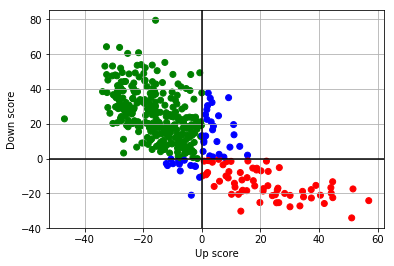

In [141]:
fig, ax = plt.subplots()
colors = ['red','green','blue']
ax.scatter(results['upscore'], results['downscore'],c = results['label'],cmap = matplotlib.colors.ListedColormap(colors))
plt.xlabel('Up score')
plt.ylabel('Down score')
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.show()

RED : MSI , GREEN : MSS

# CNA

Load the dataset

In [142]:
cna_mut = pd.read_table('data/colorectal/Mutation Count vs. CNA.txt').drop(['Patient ID','Group'],axis=1)
cna_mut.head()

,Sample ID,Mutation Count,CNA
0,TCGA-A6-2675-01,NaN,0.220794
1,TCGA-A6-5667-01,NaN,0.546520
2,TCGA-AA-3655-01,NaN,0.139335
3,TCGA-AA-3660-01,NaN,0.338368
4,TCGA-AA-3662-01,NaN,0.441361


In [143]:
results = results.merge(cna_mut, how='outer', left_on='id', right_on='Sample ID')
results.head()

,id,upscore,downscore,ces,cat,label,Sample ID,Mutation Count,CNA
0,TCGA-D5-6531-01,-7.6179,12.6261,1.8834,mss,1.0,TCGA-D5-6531-01,NaN,0.645299
1,TCGA-DM-A28A-01,-15.5637,25.9099,6.4499,mss,1.0,TCGA-DM-A28A-01,NaN,0.269859
2,TCGA-DC-5869-01,-9.0183,33.6345,7.8741,mss,1.0,TCGA-DC-5869-01,NaN,0.408536
3,TCGA-F4-6460-01,-25.3454,28.9109,-4.8967,mss,1.0,TCGA-F4-6460-01,NaN,0.594362
4,TCGA-DY-A1DC-01,-14.6653,20.8919,1.8764,mss,1.0,TCGA-DY-A1DC-01,NaN,0.274076




CES / CNA correlation. Colors represent the MMR deficiency classification


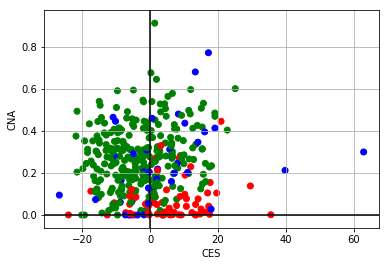

In [144]:
fig, ax = plt.subplots()
colors = ['red','green','blue']
ax.scatter(results['ces'], results['CNA'],c = results['label'],cmap = matplotlib.colors.ListedColormap(colors))
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.xlabel('CES')
plt.ylabel('CNA')
plt.show()

RED: MSI, GREEN : MSS

It appears the MSI patients have way less CNA than MSS patients


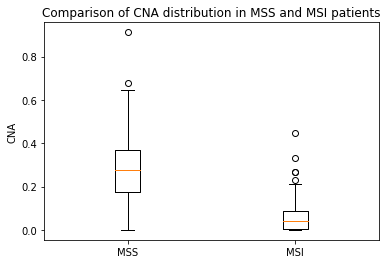

In [145]:
plt.boxplot([results[results['label']==1]['CNA'].dropna(),results[results['label']==0]['CNA'].dropna()],labels=['MSS','MSI'])
plt.ylabel('CNA')
plt.title('Comparison of CNA distribution in MSS and MSI patients')
plt.show()

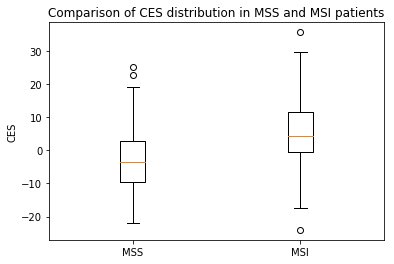

In [146]:
plt.boxplot([results[results['cat']=='mss']['ces'],results[results['cat']=='msi']['ces']],labels=['MSS','MSI'])
plt.ylabel('CES')
plt.title('Comparison of CES distribution in MSS and MSI patients')
plt.show()

# Mutations

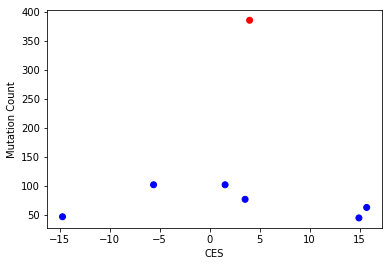

In [147]:
fig, ax = plt.subplots()
colors = ['red','green','blue']
ax.scatter(results['ces'], results['Mutation Count'],c = results['label'],cmap = matplotlib.colors.ListedColormap(colors))
plt.xlabel('CES')
plt.ylabel('Mutation Count')
plt.show()

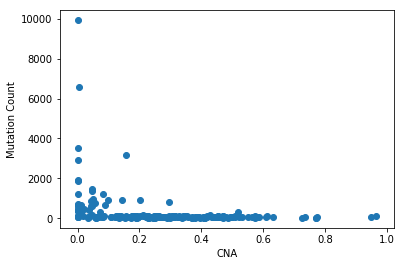

In [148]:
fig, ax = plt.subplots()
colors = ['red','green','blue']
ax.scatter(results['CNA'], results['Mutation Count'])#,c = results['label'],cmap = matplotlib.colors.ListedColormap(colors))
plt.xlabel('CNA')
plt.ylabel('Mutation Count')
plt.show()

# MLH1 study

In [149]:
df_expr = pd.read_table('data/colorectal/mmr_expr.txt')
mlh1 = df_expr[df_expr['COMMON']=='MLH1'].transpose()[2:]
mlh1.columns=['mlh1']
mlh1.head()

,mlh1
TCGA-D5-6531-01,-0.6444
TCGA-DM-A28A-01,0.643
TCGA-DC-5869-01,2.5549
TCGA-F4-6460-01,0.0455
TCGA-DY-A1DC-01,0.2859


In [150]:
df_meth = pd.read_table('data/colorectal/mmr_meth.txt')
mlh1_meth = df_meth[df_meth['COMMON']=='MLH1'].transpose()[2:]
mlh1_meth.columns=['mlh1_meth']
mlh1_meth.head()

,mlh1_meth
TCGA-AA-3860-01,NaN
TCGA-DM-A28A-01,0.0248725
TCGA-DC-5869-01,0.0623723
TCGA-F4-6460-01,0.0460492
TCGA-AA-A00N-01,NaN


In [151]:
results = results.merge(mlh1, how='outer', left_on='id', right_index=True)
results = results.merge(mlh1_meth, how='outer', left_on='id', right_index=True)
results.head()

,id,upscore,downscore,ces,cat,label,Sample ID,Mutation Count,CNA,mlh1,mlh1_meth
0,TCGA-D5-6531-01,-7.6179,12.6261,1.8834,mss,1.0,TCGA-D5-6531-01,NaN,0.645299,-0.6444,0.018947
1,TCGA-DM-A28A-01,-15.5637,25.9099,6.4499,mss,1.0,TCGA-DM-A28A-01,NaN,0.269859,0.643,0.0248725
2,TCGA-DC-5869-01,-9.0183,33.6345,7.8741,mss,1.0,TCGA-DC-5869-01,NaN,0.408536,2.5549,0.0623723
3,TCGA-F4-6460-01,-25.3454,28.9109,-4.8967,mss,1.0,TCGA-F4-6460-01,NaN,0.594362,0.0455,0.0460492
4,TCGA-DY-A1DC-01,-14.6653,20.8919,1.8764,mss,1.0,TCGA-DY-A1DC-01,NaN,0.274076,0.2859,0.0815832


## Comparison CES/MLH1

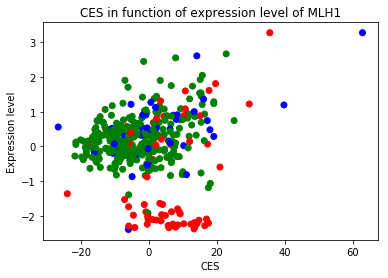

In [152]:
fig , ax = plt.subplots()
colors=['red','green','blue']
ax.scatter(results['ces'],results['mlh1'],c = results['label'],cmap = matplotlib.colors.ListedColormap(colors))
plt.xlabel('CES')
plt.ylabel('Expression level')
plt.title('CES in function of expression level of MLH1')
plt.show()



RED: MSI, GREEN : MSS, BLUE : unkown


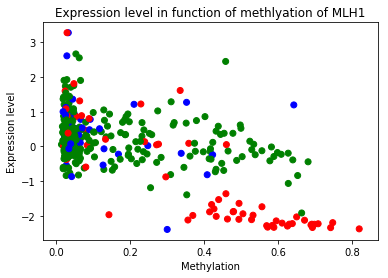

In [153]:
fig, ax = plt.subplots()
colors = ['red','green','blue']
ax.scatter(results['mlh1_meth'],results['mlh1'] , c = results['label'],cmap = matplotlib.colors.ListedColormap(colors))
plt.xlabel('Methylation')
plt.ylabel('Expression level')
plt.title('Expression level in function of methlyation of MLH1')
plt.show()

% of MSI tumors with an expression level of MLH1 under -1

In [154]:
float(np.sum(results[results['cat']=='msi']['mlh1']<-1))/float(len(results[results['cat']=='msi']['mlh1'].dropna()))

0.5757575757575758

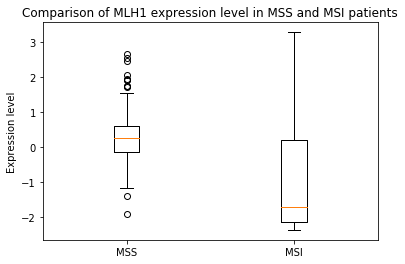

In [155]:
l1  = list(results[results['cat']=='mss']['mlh1'])
l2 = list(results[results['cat']=='msi']['mlh1'])
plt.boxplot([l1,l2],labels=['MSS','MSI'])
plt.ylabel('Expression level')
plt.title('Comparison of MLH1 expression level in MSS and MSI patients')
plt.show()

# MSH2 study

In [156]:
df_expr = pd.read_table('data/colorectal/mmr_expr.txt')
msh2 = df_expr[df_expr['COMMON']=='MSH2'].transpose()[2:]
msh2.columns=['msh2']
msh2.head()

,msh2
TCGA-D5-6531-01,0.313
TCGA-DM-A28A-01,0.5116
TCGA-DC-5869-01,2.7492
TCGA-F4-6460-01,-0.6859
TCGA-DY-A1DC-01,0.042


In [157]:
df_meth = pd.read_table('data/colorectal/mmr_meth.txt')
msh2_meth = df_meth[df_meth['COMMON']=='MSH2'].transpose()[2:]
msh2_meth.columns=['msh2_meth']
msh2_meth.head()

,msh2_meth
TCGA-AA-3860-01,NaN
TCGA-DM-A28A-01,0.0179456
TCGA-DC-5869-01,0.0176133
TCGA-F4-6460-01,0.0131548
TCGA-AA-A00N-01,NaN


In [158]:
results = results.merge(msh2, how='outer', left_on='id', right_index=True)
results = results.merge(msh2_meth, how='outer', left_on='id', right_index=True)
results.head()

,id,upscore,downscore,ces,cat,label,Sample ID,Mutation Count,CNA,mlh1,mlh1_meth,msh2,msh2_meth
0,TCGA-D5-6531-01,-7.6179,12.6261,1.8834,mss,1.0,TCGA-D5-6531-01,NaN,0.645299,-0.6444,0.018947,0.313,0.0131708
1,TCGA-DM-A28A-01,-15.5637,25.9099,6.4499,mss,1.0,TCGA-DM-A28A-01,NaN,0.269859,0.643,0.0248725,0.5116,0.0179456
2,TCGA-DC-5869-01,-9.0183,33.6345,7.8741,mss,1.0,TCGA-DC-5869-01,NaN,0.408536,2.5549,0.0623723,2.7492,0.0176133
3,TCGA-F4-6460-01,-25.3454,28.9109,-4.8967,mss,1.0,TCGA-F4-6460-01,NaN,0.594362,0.0455,0.0460492,-0.6859,0.0131548
4,TCGA-DY-A1DC-01,-14.6653,20.8919,1.8764,mss,1.0,TCGA-DY-A1DC-01,NaN,0.274076,0.2859,0.0815832,0.042,0.0185002


## Comparison CES/MSH2

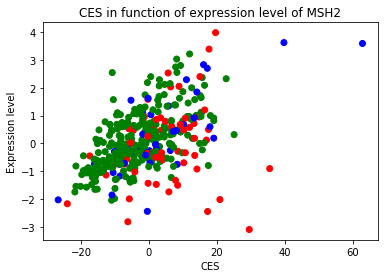

In [159]:
fig , ax = plt.subplots()
colors=['red','green','blue']
ax.scatter(results['ces'],results['msh2'],c = results['label'],cmap = matplotlib.colors.ListedColormap(colors))
plt.xlabel('CES')
plt.ylabel('Expression level')
plt.title('CES in function of expression level of MSH2')
plt.show()

In [164]:
import scipy
tmp = results[['ces','msh2']].dropna()
scipy.stats.spearmanr(tmp['ces'],tmp['msh2']).pvalue

1.8378781156248189e-25



RED: MSI, GREEN : MSS, BLUE : unkown


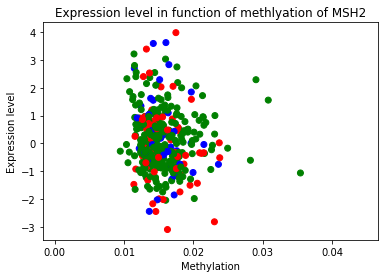

In [160]:
fig, ax = plt.subplots()
colors = ['red','green','blue']
ax.scatter(results['msh2_meth'],results['msh2'] , c = results['label'],cmap = matplotlib.colors.ListedColormap(colors))
plt.xlabel('Methylation')
plt.ylabel('Expression level')
plt.title('Expression level in function of methlyation of MSH2')
plt.show()

% of MSI tumors with an expression level of MLH1 under -1

In [165]:
float(np.sum(results[results['cat']=='msi']['msh2']<-1))/float(len(results[results['cat']=='msi']['msh2'].dropna()))

0.19696969696969696

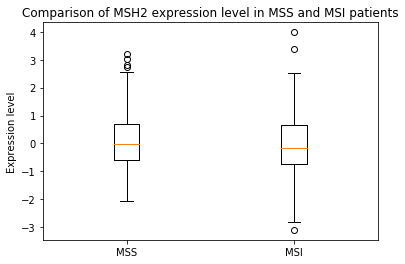

In [162]:
l1  = list(results[results['cat']=='mss']['msh2'])
l2 = list(results[results['cat']=='msi']['msh2'])
plt.boxplot([l1,l2],labels=['MSS','MSI'])
plt.ylabel('Expression level')
plt.title('Comparison of MSH2 expression level in MSS and MSI patients')
plt.show()

# MSH6 study

In [175]:
df_expr = pd.read_table('data/colorectal/mmr_expr.txt')
msh2 = df_expr[df_expr['COMMON']=='PMS2'].transpose()[2:]
msh2.columns=['pms2']
msh2.head()

,pms2
TCGA-D5-6531-01,1.62
TCGA-DM-A28A-01,1.7332
TCGA-DC-5869-01,1.3353
TCGA-F4-6460-01,1.8744
TCGA-DY-A1DC-01,0.9144


In [176]:
df_meth = pd.read_table('data/colorectal/mmr_meth.txt')
msh2_meth = df_meth[df_meth['COMMON']=='PMS2'].transpose()[2:]
msh2_meth.columns=['pms2_meth']
msh2_meth.head()

,pms2_meth
TCGA-AA-3860-01,NaN
TCGA-DM-A28A-01,0.0642169
TCGA-DC-5869-01,0.0610065
TCGA-F4-6460-01,0.0384854
TCGA-AA-A00N-01,NaN


In [177]:
results = results.merge(msh2, how='outer', left_on='id', right_index=True)
results = results.merge(msh2_meth, how='outer', left_on='id', right_index=True)
results.head()

,id,upscore,downscore,ces,cat,label,Sample ID,Mutation Count,CNA,mlh1,mlh1_meth,msh2,msh2_meth,msh6,msh6_meth,pms2,pms2_meth
0,TCGA-D5-6531-01,-7.6179,12.6261,1.8834,mss,1.0,TCGA-D5-6531-01,NaN,0.645299,-0.6444,0.018947,0.313,0.0131708,1.2449,0.0512504,1.62,0.0430972
1,TCGA-DM-A28A-01,-15.5637,25.9099,6.4499,mss,1.0,TCGA-DM-A28A-01,NaN,0.269859,0.643,0.0248725,0.5116,0.0179456,0.4288,0.0621377,1.7332,0.0642169
2,TCGA-DC-5869-01,-9.0183,33.6345,7.8741,mss,1.0,TCGA-DC-5869-01,NaN,0.408536,2.5549,0.0623723,2.7492,0.0176133,1.2682,0.058207,1.3353,0.0610065
3,TCGA-F4-6460-01,-25.3454,28.9109,-4.8967,mss,1.0,TCGA-F4-6460-01,NaN,0.594362,0.0455,0.0460492,-0.6859,0.0131548,-1.2261,0.0694737,1.8744,0.0384854
4,TCGA-DY-A1DC-01,-14.6653,20.8919,1.8764,mss,1.0,TCGA-DY-A1DC-01,NaN,0.274076,0.2859,0.0815832,0.042,0.0185002,-1.1349,0.0867732,0.9144,0.0475658


## Comparison CES/MSH2

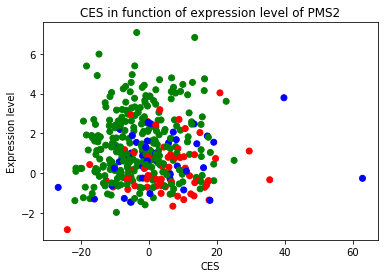

In [178]:
fig , ax = plt.subplots()
colors=['red','green','blue']
ax.scatter(results['ces'],results['pms2'],c = results['label'],cmap = matplotlib.colors.ListedColormap(colors))
plt.xlabel('CES')
plt.ylabel('Expression level')
plt.title('CES in function of expression level of PMS2')
plt.show()

In [179]:
import scipy
tmp = results[['ces','pms2']].dropna()
scipy.stats.spearmanr(tmp['ces'],tmp['pms2']).pvalue

0.98331750232144843



RED: MSI, GREEN : MSS, BLUE : unkown


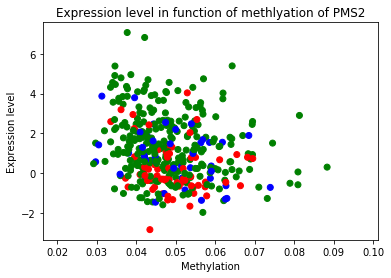

In [181]:
fig, ax = plt.subplots()
colors = ['red','green','blue']
ax.scatter(results['pms2_meth'],results['pms2'] , c = results['label'],cmap = matplotlib.colors.ListedColormap(colors))
plt.xlabel('Methylation')
plt.ylabel('Expression level')
plt.title('Expression level in function of methlyation of PMS2')
plt.show()

% of MSI tumors with an expression level of MLH1 under -1

In [165]:
float(np.sum(results[results['cat']=='msi']['msh2']<-1))/float(len(results[results['cat']=='msi']['msh2'].dropna()))

0.19696969696969696

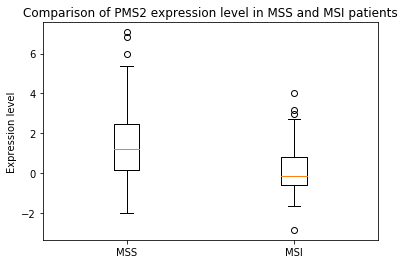

In [183]:
l1  = list(results[results['cat']=='mss']['pms2'])
l2 = list(results[results['cat']=='msi']['pms2'])
plt.boxplot([l1,l2],labels=['MSS','MSI'])
plt.ylabel('Expression level')
plt.title('Comparison of PMS2 expression level in MSS and MSI patients')
plt.show()